# EDA v3 — Phishing Detector España (outputs/dataset_v3_features.csv, outputs/dataset_v3_metadata.json)



In [5]:
# 1. Carga de datos y metadatos
import pandas as pd
import json

df = pd.read_csv("../data/interim/dataset_v3_features.csv")
with open("../data/interim/dataset_v3_metadata.json") as f:
    meta = json.load(f)

print("Shape dataset:", df.shape)
print("Columnas:", df.columns.tolist())
print("Metadata:")
print(meta)
df.head()



Shape dataset: (482, 13)
Columnas: ['url', 'label', 'sector', 'entidad', 'notas', 'campaign', 'domain_complexity', 'domain_whitelist', 'trusted_token_context', 'host_entropy', 'infra_risk', 'brand_in_path', 'brand_match_flag']
Metadata:
{'commit_hash': '8267558b3ec93917de5186915827481b45fde331', 'input_path': 'data/clean/dataset_v2.csv', 'output_path': 'data/interim/dataset_v3_features.csv', 'whitelist_path': 'docs/whitelist.csv', 'brands_path': 'docs/dominios_espanyoles.csv', 'neutral_domains_path': 'docs/global_neutral_domains.csv', 'features_version': 'v3', 'features_list': ['domain_complexity', 'domain_whitelist', 'trusted_token_context', 'host_entropy', 'infra_risk', 'brand_in_path', 'brand_match_flag'], 'row_count_input': 482, 'row_count_output': 482, 'null_counts_por_feature': {'domain_complexity': 0, 'domain_whitelist': 0, 'trusted_token_context': 0, 'host_entropy': 0, 'infra_risk': 0, 'brand_in_path': 0, 'brand_match_flag': 0}, 'timestamp': '2025-12-12T13:50:27.178268', 'schem

,url,label,sector,entidad,notas,campaign,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
0,https://www.caixabank.es/particular/banca-digi...,0,banca,caixabank,home bancaria oficial,NaN,0.0,1,1,-0.0,0.0,0,1
1,https://www.ibercaja.es/particulares/,0,banca,ibercaja,NaN,NaN,0.0,1,1,-0.0,0.0,0,0
2,https://www.wizink.es/tarjetas,0,banca,wizink,NaN,NaN,0.0,1,1,-0.0,0.0,0,0
3,https://www.wizink.es/,0,banca,wizink,NaN,NaN,0.0,1,1,-0.0,0.0,0,0
4,https://www.cetelem.es/credito-y-prestamos/,0,banca,cetelem,NaN,NaN,0.0,1,1,-0.0,0.0,0,0


## Distribución general y calidad de los datos


In [6]:
# Duplicados de url
dups = df.duplicated(subset=["url"]).sum()
print("Duplicados url:", dups)

# Balance de etiquetas
print(df["label"].value_counts())

# Nulos por columna
print(df.isnull().sum())



Duplicados url: 0
label
0    241
1    241
Name: count, dtype: int64
url                        0
label                      0
sector                     0
entidad                    0
notas                    148
campaign                 391
domain_complexity          0
domain_whitelist           0
trusted_token_context      0
host_entropy               0
infra_risk                 0
brand_in_path              0
brand_match_flag           0
dtype: int64


In [7]:
# Conteo de sector, entidad, campaign
print("Sector:\n", df["sector"].value_counts().head(10))
print("Entidad:\n", df["entidad"].value_counts().head(10))
print("Campaign:\n", df["campaign"].value_counts().head(5))



Sector:
 sector
banca        191
logistica     93
generico      55
saas          36
cripto        22
publico       18
ecommerce     17
teleco        13
energia       12
streaming      9
Name: count, dtype: int64
Entidad:
 entidad
correos      73
generico     56
santander    43
caixabank    26
ing          26
bbva         24
dgt          10
bankinter     9
binance       8
netflix       7
Name: count, dtype: int64
Campaign:
 campaign
multa.net                                                2
weebly.com/recibo-de-pago                                1
infotecnikas.es/re.html                                  1
alertascliente.webcindario.com                           1
authline-checkappr0v.com.es/7ait03j82stf28&sp_aqd=d2…    1
Name: count, dtype: int64


## Análisis descriptivo y separación por feature (v3)


==== domain_complexity ====


count    482.000000
mean       0.404573
std        0.378987
min        0.000000
25%        0.000000
50%        0.349774
75%        0.829040
max        1.000000
Name: domain_complexity, dtype: float64

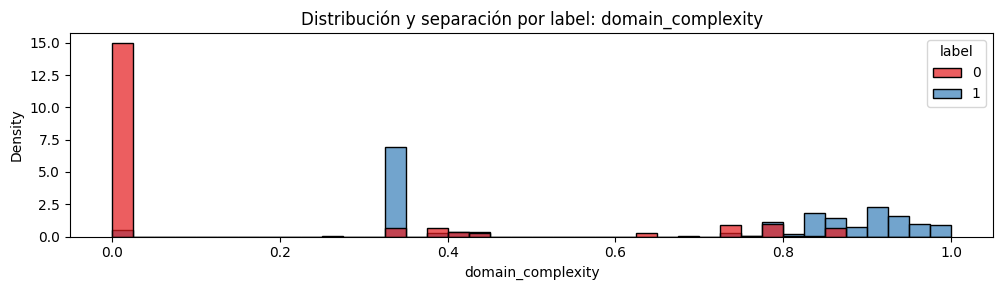

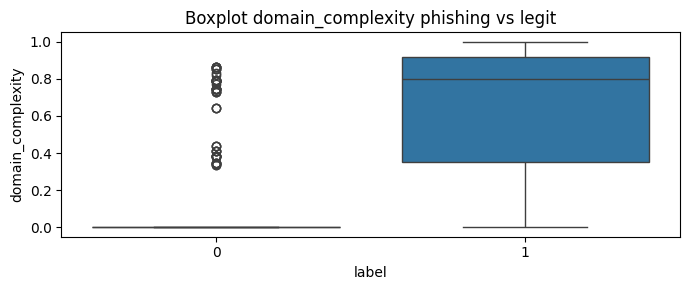

==== domain_whitelist ====


count    482.000000
mean       0.385892
std        0.487311
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: domain_whitelist, dtype: float64

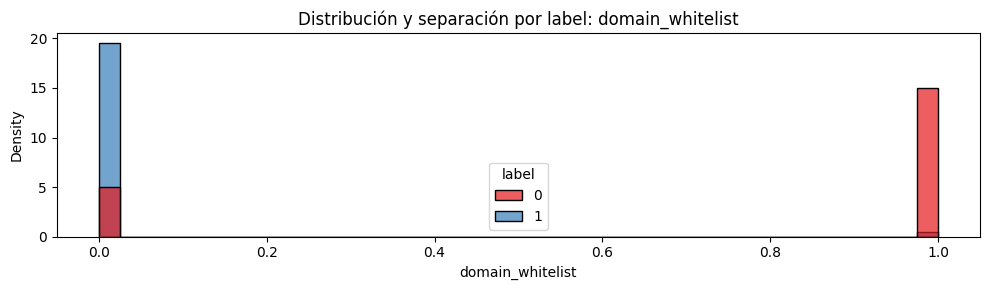

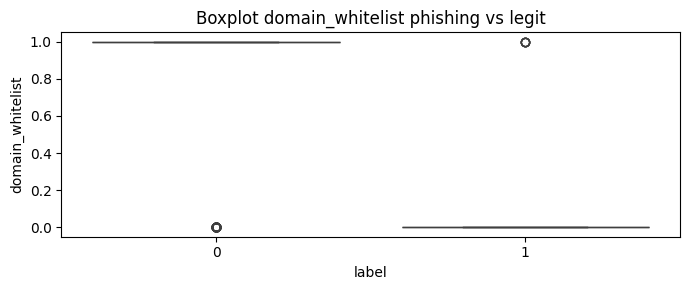

==== trusted_token_context ====


count    482.000000
mean      -0.215768
std        0.971057
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        1.000000
max        1.000000
Name: trusted_token_context, dtype: float64

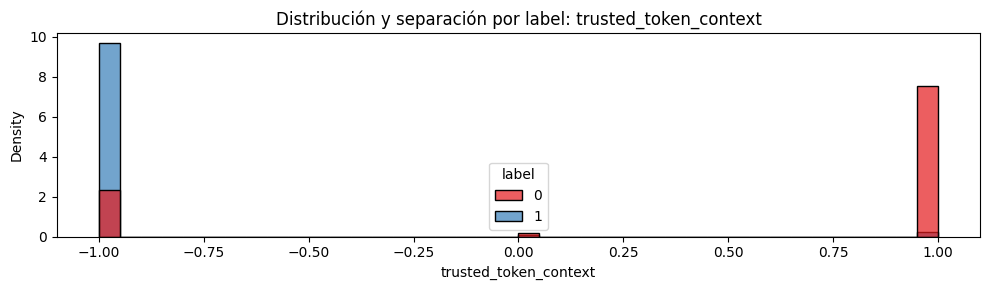

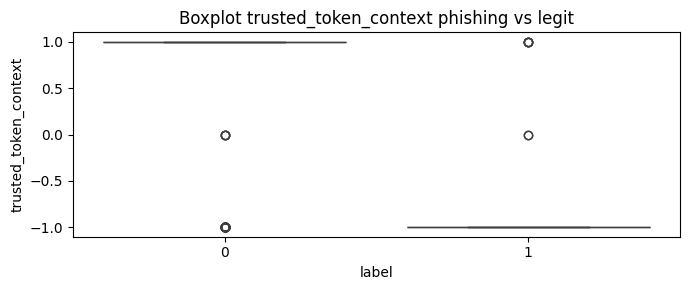

==== host_entropy ====


count    482.000000
mean       1.571070
std        1.683620
min       -0.000000
25%        0.000000
50%       -0.000000
75%        3.326673
max        4.351837
Name: host_entropy, dtype: float64

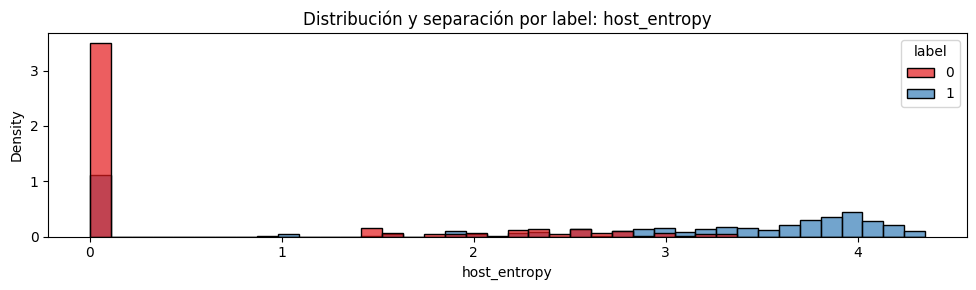

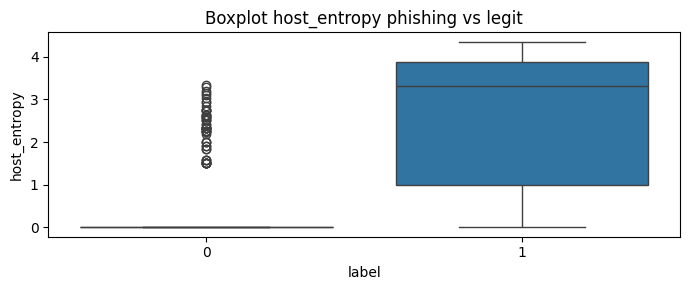

==== infra_risk ====


count    482.000000
mean       0.614938
std        1.167253
min        0.000000
25%        0.000000
50%        0.000000
75%        0.300000
max        3.300000
Name: infra_risk, dtype: float64

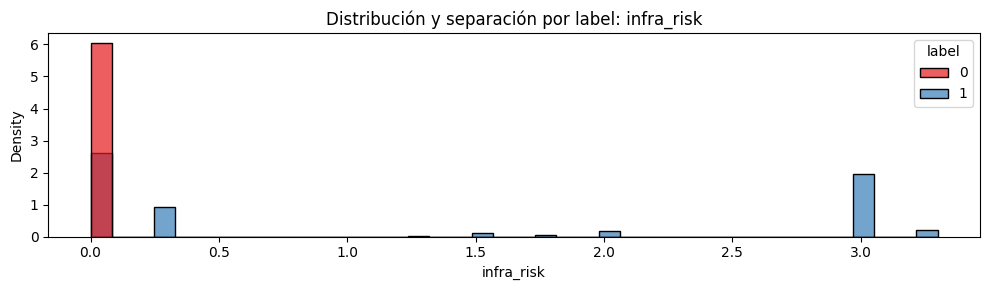

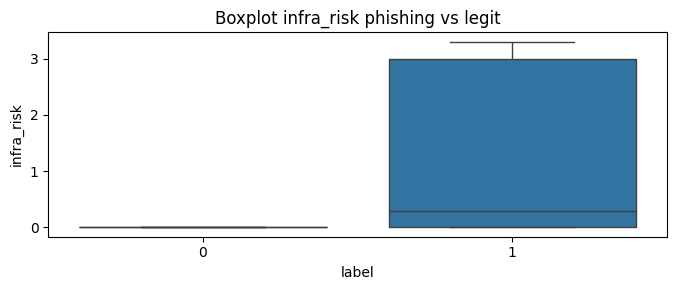

==== brand_in_path ====


count    482.000000
mean       0.014523
std        0.119757
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: brand_in_path, dtype: float64

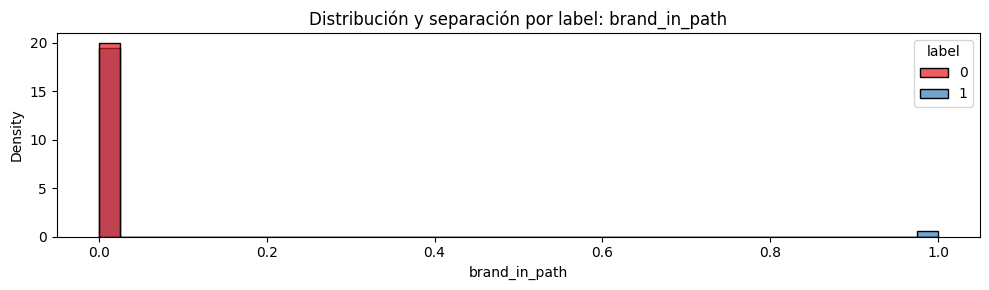

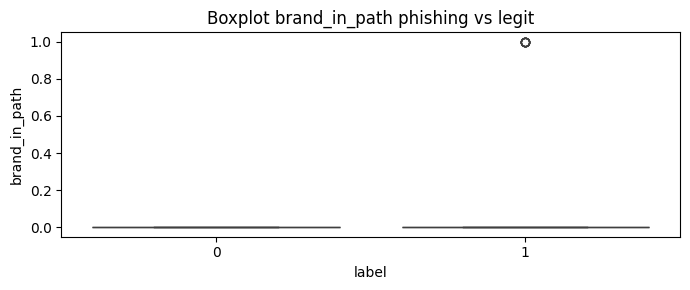

==== brand_match_flag ====


count    482.000000
mean       0.215768
std        0.411781
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: brand_match_flag, dtype: float64

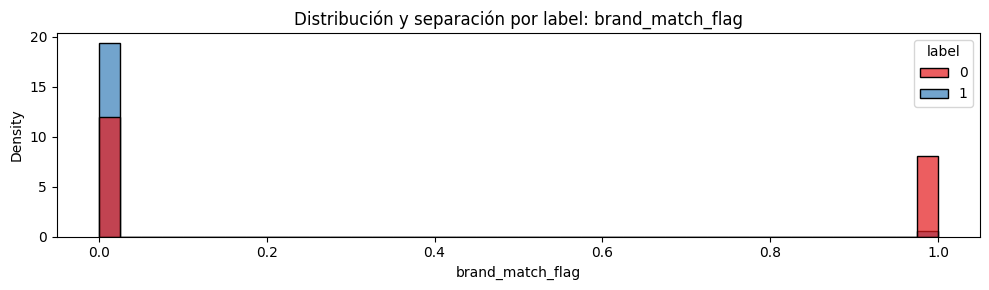

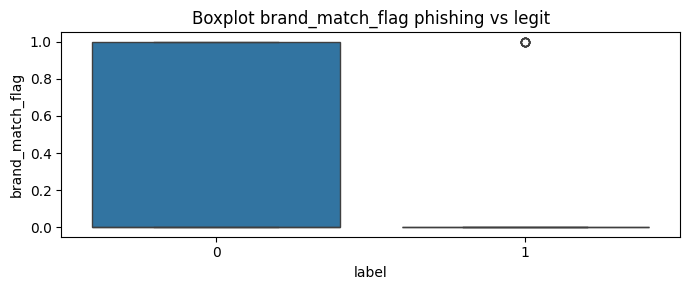

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

features_v3 = [
    "domain_complexity","domain_whitelist","trusted_token_context",
    "host_entropy","infra_risk","brand_in_path","brand_match_flag"
]

for col in features_v3:
    print(f"==== {col} ====")
    display(df[col].describe())
    plt.figure(figsize=(10,3))
    sns.histplot(df, x=col, hue="label", bins=40, alpha=0.7, palette="Set1", stat="density")
    plt.title(f"Distribución y separación por label: {col}")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(7,3))
    sns.boxplot(data=df, x="label", y=col)
    plt.title(f"Boxplot {col} phishing vs legit")
    plt.tight_layout()
    plt.show()



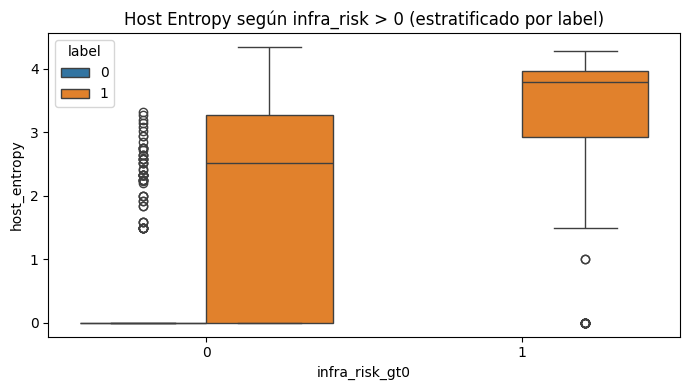

In [9]:
# Boxplot de host_entropy vs binarización infra_risk (>0), estratificado por label
df_plot = df.copy()
df_plot["infra_risk_gt0"] = (df_plot["infra_risk"] > 0).astype(int)
plt.figure(figsize=(7,4))
sns.boxplot(data=df_plot, x="infra_risk_gt0", y="host_entropy", hue="label")
plt.title("Host Entropy según infra_risk > 0 (estratificado por label)")
plt.tight_layout()
plt.show()



In [10]:
for f in features_v3:
    val_legit = df[df["label"]==0][f]
    val_phish = df[df["label"]==1][f]
    # Outliers básicos
    for cls, vd in zip(["Legit", "Phish"], [val_legit, val_phish]):
        q1, q3 = vd.quantile([0.25,0.75])
        iqr = q3-q1
        out = vd[(vd < q1-1.5*iqr) | (vd > q3+1.5*iqr)]
        print(f"{f}-{cls}: outliers={len(out)}")



domain_complexity-Legit: outliers=60
domain_complexity-Phish: outliers=0
domain_whitelist-Legit: outliers=60
domain_whitelist-Phish: outliers=5
trusted_token_context-Legit: outliers=60
trusted_token_context-Phish: outliers=7
host_entropy-Legit: outliers=57
host_entropy-Phish: outliers=0
infra_risk-Legit: outliers=0
infra_risk-Phish: outliers=0
brand_in_path-Legit: outliers=0
brand_in_path-Phish: outliers=7
brand_match_flag-Legit: outliers=0
brand_match_flag-Phish: outliers=7


In [11]:
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp

for col in features_v3:
    auc = roc_auc_score(df["label"], df[col])
    ks = ks_2samp(df[df["label"]==1][col], df[df["label"]==0][col]).statistic
    print(f"{col}: AUC={auc:.3f} | KS={ks:.3f}")



domain_complexity: AUC=0.889 | KS=0.739
domain_whitelist: AUC=0.135 | KS=0.730
trusted_token_context: AUC=0.128 | KS=0.739
host_entropy: AUC=0.830 | KS=0.593
infra_risk: AUC=0.784 | KS=0.568
brand_in_path: AUC=0.515 | KS=0.029
brand_match_flag: AUC=0.313 | KS=0.373


## Observaciones
- Anota aquí cualquier observación relevante de los patrones observados, sin proponer cambios ni hipótesis causales.
- Por ejemplo: rangos observados, posibles valores atípicos, distribución esperada/inesperada por clase, o cohortes con desviación en features específicas.

